In [ ]:
# Collecting Weather Data From NOAA API

In [46]:
import requests
import pandas as pd

def fetch_weather_data(access_token, station_id, start_date, end_date, datatype_id):
    base_url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"
    headers = {'token': access_token}
    params = {
        'datasetid': 'GHCND',
        'stationid': station_id,
        'startdate': start_date,
        'enddate': end_date,
        'datatypeid': datatype_id,
        'limit': 1000,
        'units': 'standard',
    }
    
    response = requests.get(base_url, headers=headers, params=params)
    
    if response.status_code == 200:
        return pd.DataFrame(response.json()['results'])
    else:
        print(f"Failed to fetch {datatype_id}. Status code: {response.status_code}")
        return pd.DataFrame()


In [47]:
access_token = 'soGJgwoYSoIhjtyZEYlVygMcHoxBDFFQ'  # Replace with your actual access token
station_id = 'GHCND:USW00094728'
start_date = '2022-01-01'
end_date = '2022-12-31'
datatype_ids = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']

# Initialize an empty DataFrame to hold merged results
weather_data = pd.DataFrame()

for datatype_id in datatype_ids:
    df= fetch_weather_data(access_token, station_id, start_date, end_date, datatype_id)
    
    if not df.empty:
        # Pivot the data so that each row represents a single date and each column a datatype
        df_pivot = df.pivot(index='date', columns='datatype', values='value')
        
        # Merge with the main DataFrame
        if weather_data.empty:
            weather_data = df_pivot
        else:
            weather_data = weather_data.merge(df_pivot, left_index=True, right_index=True, how='outer')

# Reset index to make 'date' a column
weather_data.reset_index(inplace=True)

print(weather_data.head())


datatype                 date  PRCP  SNOW  SNWD  TMAX  TMIN
0         2022-01-01T00:00:00  0.79   0.0   0.0  56.0  50.0
1         2022-01-02T00:00:00  0.04   0.0   0.0  59.0  37.0
2         2022-01-03T00:00:00  0.00   0.0   0.0  37.0  22.0
3         2022-01-04T00:00:00  0.00   0.0   0.0  34.0  19.0
4         2022-01-05T00:00:00  0.23   0.0   0.0  47.0  31.0


In [49]:
import pandas as pd

# Load the dataset

# Display the first few rows of the dataset and summary information
display_info = weather_data.head()
summary_info = weather_data.describe(include='all')

display_info, summary_info


(datatype                 date  PRCP  SNOW  SNWD  TMAX  TMIN
 0         2022-01-01T00:00:00  0.79   0.0   0.0  56.0  50.0
 1         2022-01-02T00:00:00  0.04   0.0   0.0  59.0  37.0
 2         2022-01-03T00:00:00  0.00   0.0   0.0  37.0  22.0
 3         2022-01-04T00:00:00  0.00   0.0   0.0  34.0  19.0
 4         2022-01-05T00:00:00  0.23   0.0   0.0  47.0  31.0,
 datatype                 date        PRCP        SNOW        SNWD        TMAX  \
 count                     365  365.000000  365.000000  365.000000  365.000000   
 unique                    365         NaN         NaN         NaN         NaN   
 top       2022-01-01T00:00:00         NaN         NaN         NaN         NaN   
 freq                        1         NaN         NaN         NaN         NaN   
 mean                      NaN    0.126849    0.048493    0.123836   63.745205   
 std                       NaN    0.290192    0.500197    0.786847   18.320506   
 min                       NaN    0.000000    0.000000    0

In [50]:
# Convert 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.date

# Check data types after conversion
data_types_after = weather_data.dtypes

# Check for any inconsistencies such as TMAX < TMIN
inconsistencies = weather_data[weather_data['TMAX'] < weather_data['TMIN']]

data_types_after, inconsistencies


(datatype
 date     object
 PRCP    float64
 SNOW    float64
 SNWD    float64
 TMAX    float64
 TMIN    float64
 dtype: object,
 Empty DataFrame
 Columns: [date, PRCP, SNOW, SNWD, TMAX, TMIN]
 Index: [])

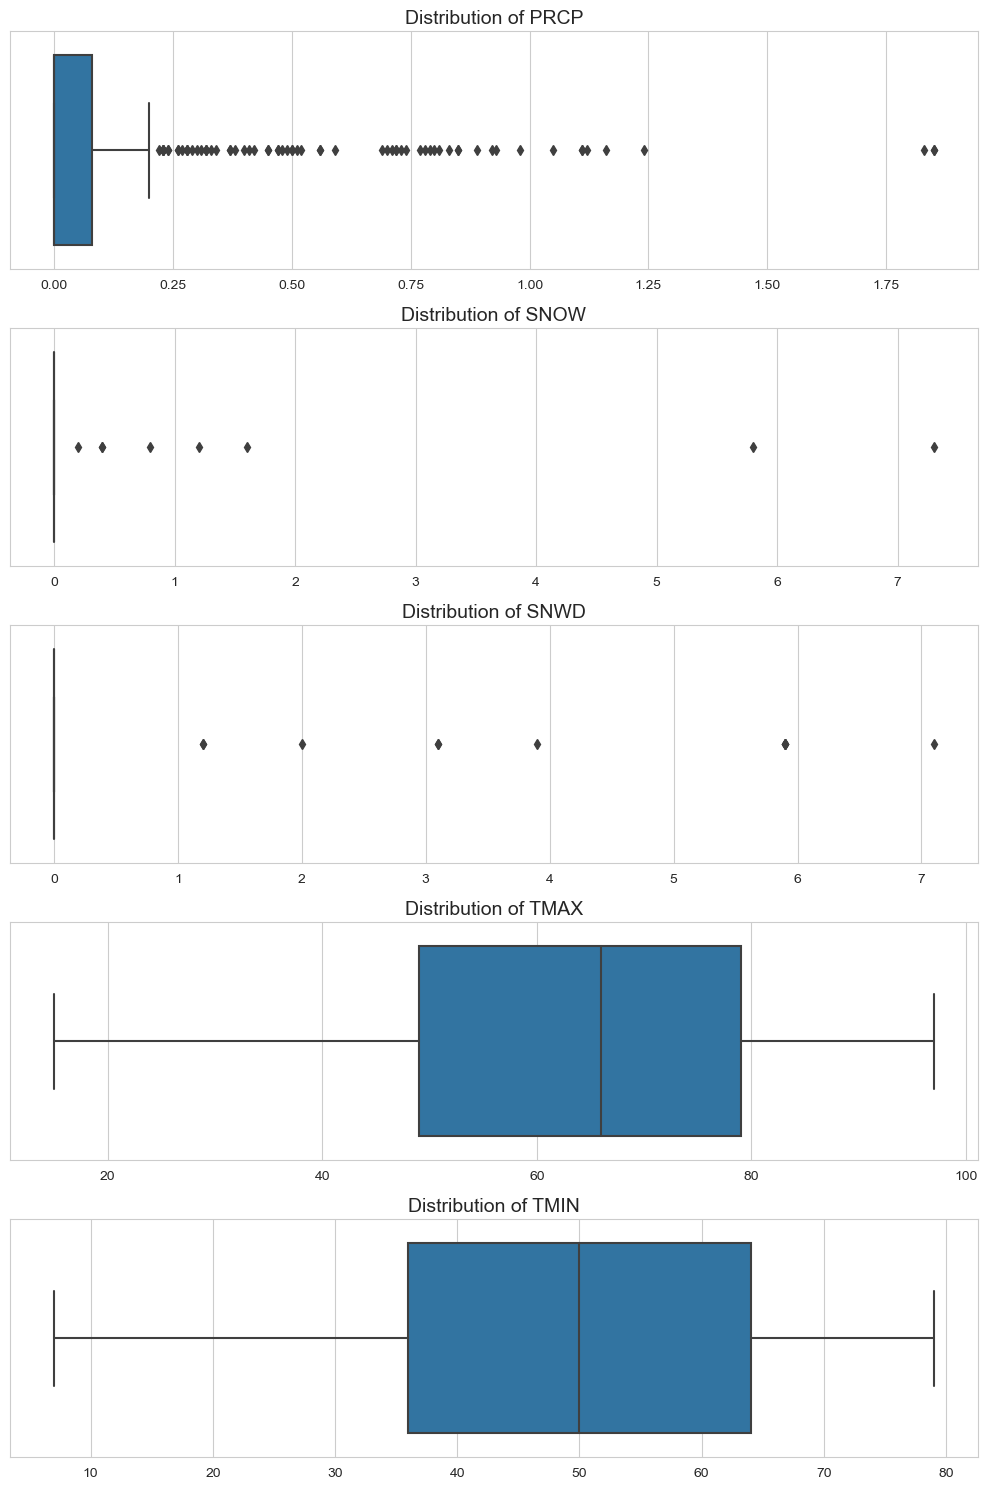

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a list of columns to plot
columns_to_plot = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']

# Plotting
fig, ax = plt.subplots(len(columns_to_plot), 1, figsize=(10, 15))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=weather_data[column], ax=ax[i])
    ax[i].set_title(f'Distribution of {column}', fontsize=14)
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()


In [68]:
csv_file_path = 'weather_data.csv'  # Specify your desired file path
weather_data.to_csv(csv_file_path, index=False)